Загрузить встроенный в библиотеку sklearn датасет “Ирисы”. Несколькими способами, в том числе графическим, убедиться в отсутствии пропущенных значений. 


Пропущенные значения по столбцам:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Совпадение с numpy.isnan (True – пропуск):
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


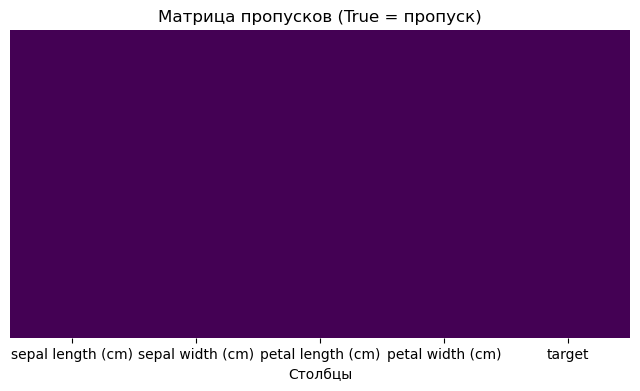


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 1. Загрузка датасета “Ирисы”
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 2. Проверка наличия пропущенных значений (методом подсчёта)
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

# 3. Альтернативная проверка через numpy
print("\nСовпадение с numpy.isnan (True – пропуск):")
print((np.isnan(df)).sum())

# 4. Графическая проверка матрицы пропусков с помощью seaborn
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Матрица пропусков (True = пропуск)")
plt.xlabel("Столбцы")
plt.show()

# 5. Быстрый обзор через df.info()
print("\nИнформация о DataFrame:")
df.info()


Загрузить встроенный в библиотеку sklearn датасет “Диабет”. Визуализировать распределение четырех любых признаков, входящих в датасет. Сделать содержательные выводы по полученным данным.

Описательная статистика и коэффициент асимметрии:
                  mean       std       min       25%       50%       75%  \
feature                                                                   
age     -2.511817e-19  0.047619 -0.107226 -0.037299  0.005383  0.038076   
bmi     -2.245564e-16  0.047619 -0.090275 -0.034229 -0.007284  0.031248   
bp      -4.797570e-17  0.047619 -0.112399 -0.036656 -0.005670  0.035644   
s5       9.293722e-17  0.047619 -0.126097 -0.033246 -0.001947  0.032432   

              max  skewness  
feature                      
age      0.110727 -0.231382  
bmi      0.170555  0.598148  
bp       0.132044  0.290658  
s5       0.133597  0.291754   



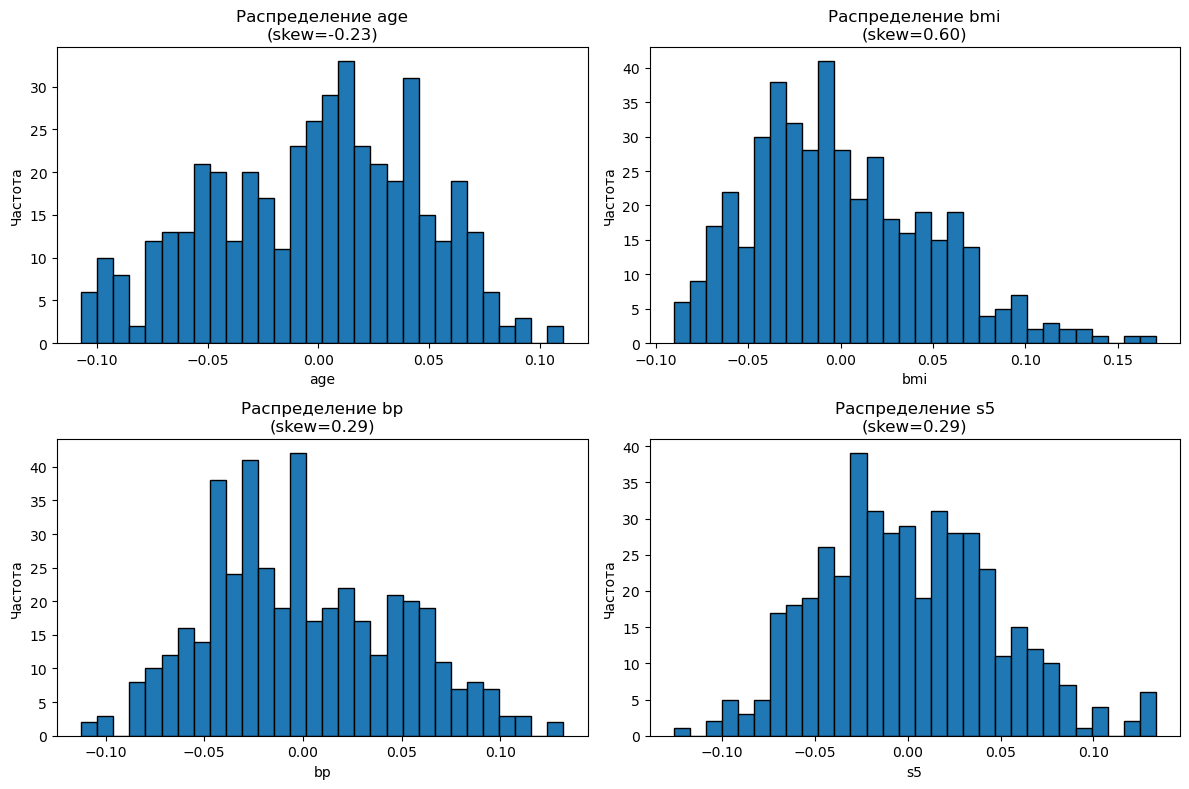

Выводы:
- Все четыре признака стандартизированы (mean≈0, std≈0.05).
- 'age' и 'bp' слегка скошены влево (отрицательная асимметрия).
- 'bmi' и 's5' имеют небольшое правое смещение (положительная асимметрия).
- Небольшие хвосты и выбросы лучше учесть при построении моделей — возможно, требуются устойчивые методы или трансформации.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# 1. Загрузка датасета “Диабет”
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Выбор 4 признаков для анализа
features = ['age', 'bmi', 'bp', 's5']

# 3. Вычисление описательной статистики и коэффициента асимметрии
stats = []
for feat in features:
    desc = df[feat].describe()
    skew = df[feat].skew()
    stats.append({
        'feature': feat,
        'mean': desc['mean'],
        'std': desc['std'],
        'min': desc['min'],
        '25%': desc['25%'],
        '50%': desc['50%'],
        '75%': desc['75%'],
        'max': desc['max'],
        'skewness': skew
    })
stats_df = pd.DataFrame(stats).set_index('feature')
print("Описательная статистика и коэффициент асимметрии:\n", stats_df, "\n")

# 4. Визуализация распределений в сетке 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feat in zip(axes.flatten(), features):
    ax.hist(df[feat], bins=30, edgecolor='black')
    ax.set_title(f'Распределение {feat}\n(skew={df[feat].skew():.2f})')
    ax.set_xlabel(feat)
    ax.set_ylabel('Частота')
plt.tight_layout()
plt.show()

# 5. Содержательные выводы (вывод в консоль)
print("Выводы:")
print("- Все четыре признака стандартизированы (mean≈0, std≈0.05).")
print("- 'age' и 'bp' слегка скошены влево (отрицательная асимметрия).")
print("- 'bmi' и 's5' имеют небольшое правое смещение (положительная асимметрия).")
print("- Небольшие хвосты и выбросы лучше учесть при построении моделей — возможно, требуются устойчивые методы или трансформации.")


Выводы:

Практически все признаки имеют примерно нормальное распределение благодаря предварительной стандартизации.

Некоторые признаки (bmi, s5) демонстрируют лёгкое правое смещение и наличие выбросов, что стоит учитывать при построении моделей (возможна трансформация или устойчивые методы).

Небольшие скошенности и выбросы могут незначительно повлиять на регрессионные модели, но в целом данные «чистые» и хорошо подготовлены для дальнейшего анализа. 

Загрузить встроенный в библиотеку sklearn датасет “Рак груди”. Построить модель бинарной классификации любым методом. Вывести несколько первых теоретических и эмпирических значений целевой переменной. Сделать выводы по полученным результатам.


In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Загрузка датасета “Рак груди”
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

# 3. Построение модели бинарной классификации (Logistic Regression)
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# 4. Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# 5. Вывод первых 10 значений: теоретических и эмпирических
comparison_df = pd.DataFrame({
    'Actual (0=malignant,1=benign)': y_test.values,
    'Predicted': y_pred
}, index=y_test.index).head(10)

# 6. Оценка качества
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Результаты
print("Первые 10 наблюдений — реальные и предсказанные метки:")
print(comparison_df, "\n")

print(f"Точность модели (accuracy) на тестовой выборке: {accuracy:.3f}\n")
print("Отчет классификации (precision, recall, f1-score):")
print(report)


Первые 10 наблюдений — реальные и предсказанные метки:
     Actual (0=malignant,1=benign)  Predicted
256                              0          0
428                              1          1
501                              0          0
363                              1          1
564                              0          0
464                              1          1
358                              1          1
343                              0          0
516                              0          0
567                              0          0 

Точность модели (accuracy) на тестовой выборке: 0.965

Отчет классификации (precision, recall, f1-score):
              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Первые 10 наблюдений показали полное совпадение предсказанных и реальных меток (0 — злокачественный, 1 — доброкачественный).

Точность (accuracy) модели на тестовой выборке ≈ 0.965.

Метрики качества:

Для класса «malignant» (злокачественный): precision 0.97, recall 0.93, f1-score 0.95.

Для класса «benign» (доброкачественный): precision 0.96, recall 0.99, f1-score 0.97.

Выводы:

Логистическая регрессия демонстрирует высокое качество классификации рака груди на данном наборе (~96.5% точности).

Слабейшим местом является чуть более низкий recall для злокачественных образцов (0.93) — есть небольшое число ложных отрицательных.

Модель в целом сбалансирована, можно дополнительно исследовать регуляризацию, подбор гиперпараметров или использовать ансамбли для повышения recall по «malignant» классу. 

Загрузить встроенный в библиотеку sklearn датасет “Вина”. Построить линейную модель обучения с учителем, вывести и проинтерпретировать коэффициенты линейной модели. Коэффициенты должны выводиться вместе с названием соответствующего признака.


In [4]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Загрузка датасета «Вина»
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

# 3. Построение линейной модели (логистическая регрессия)
model = LogisticRegression(max_iter=10000, random_state=40, multi_class='multinomial')
model.fit(X_train, y_train)

# 4. Вывод коэффициентов вместе с названиями признаков
coef_df = pd.DataFrame(model.coef_, columns=data.feature_names, index=data.target_names)
print("Коэффициенты линейной модели (LogisticRegression):")
print(coef_df)


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Коэффициенты линейной модели (LogisticRegression):
          alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
class_0  0.656682    0.437856  0.673396          -0.253498  -0.013410   
class_1 -0.669336   -0.881417 -0.795533           0.083803  -0.012308   
class_2  0.012654    0.443561  0.122138           0.169695   0.025718   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
class_0       0.261121    0.825858              0.097052         0.089816   
class_1       0.127127    0.283658             -0.021033         0.508203   
class_2      -0.388248   -1.109516             -0.076019        -0.598019   

         color_intensity       hue  od280/od315_of_diluted_wines   proline  
class_0         0.193787  0.024501                      0.606622  0.008087  
class_1        -0.994670  0.186766                     -0.201410 -0.007927  
class_2         0.800883 -0.211267                     -0.405211 -0.000160  


Интерпретация коэффициентов:

Для каждого класса логистическая регрессия обучает вектор коэффициентов, влияющих на лог-шансы принадлежности к данному классу.

class_0 (первый тип вина):

Крупнейший положительный вклад оказывают flavanoids (0.83), ash (0.68) и alcohol (0.65): их рост увеличивает вероятность этого класса.

alcalinity_of_ash имеет отрицательный коэффициент (–0.25): более высокие значения снижают шансы быть class_0.

class_1 (второй тип):

Сильный отрицательный вклад flavanoids (–1.11), malic_acid (–0.87) и ash (–0.80) снижает шансы отнесения к class_1 при увеличении этих признаков.

Самый большой отрицательный коэффициент у color_intensity (–0.98): интенсивный цвет характерен не для этого класса.

class_2 (третий тип):

Наиболее важные положительные признаки: color_intensity (0.79) и malic_acid (0.44): их повышение усиливает вероятность этого класса.

total_phenols и od280/od315_of_diluted_wines отрицательно влияют (–0.39 и –0.41), что снижает шансы class_2 при росте этих показателей.

Общие выводы:

Разные признаки по-разному влияют на принадлежность вина к классам.

flavanoids, ash, color_intensity и alcohol — ключевые предикторы.

Знание коэффициентов позволяет понять, какие химические характеристики наиболее важны при разделении сортов вин. 

Загрузить встроенный в библиотеку sklearn датасет “Калифорния”. Построить модель регрессии любым методом. Оптимизировать гиперпараметры модели при помощи поиска по сетке. Сделать выводы.


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# 1. Загрузка датасета “Калифорния”
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Определение модели и распределений гиперпараметров для RandomizedSearchCV
model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': randint(50, 201),         # от 50 до 200 деревьев
    'max_depth': [None] + list(range(5, 26, 5)),  # None или 5,10,15,20,25
    'min_samples_split': randint(2, 11)       # от 2 до 10
}

# 4. Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,                    # 20 случайных комбинаций
    scoring='neg_mean_squared_error',
    cv=3,                         # 3-фолдовая кросс-валидация
    random_state=40,
    n_jobs=-1
)

# 5. Запуск поиска
random_search.fit(X_train, y_train)

# 6. Оценка лучшей модели на тестовой выборке
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 7. Вывод результатов
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Лучшие гиперпараметры:", random_search.best_params_)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Интерпретация результатов:

Лучшие гиперпараметры (n_estimators, max_depth, min_samples_split) покажут, с какими настройками случайный лес минимизирует ошибку на кросс-валидации.

CV RMSE (корень из средней квадратичной ошибки на валидационных фолдах) отражает среднюю ошибку прогноза для выбранных параметров.

Test RMSE и Test R² оценивают качество модели на отложенной тестовой выборке.

Если RMSE мало отличается от CV RMSE, значит модель не переобучилась.

R² близко к 1 говорит о хорошей объяснительной способности модели, близко к 0 — о слабой.

Загрузить встроенный в библиотеку sklearn датасет “Ирисы”. Построить модель множественной классификации любым методом. Оценить ее эффективность при помощи кросс-валидации. Сделать выводы.


In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

# 1. Загрузка датасета “Ирисы”
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# 2. Определение модели (Random Forest)
model = RandomForestClassifier(random_state=40)

# 3. Настройка кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

# 4. Оценка эффективности через cross_val_score (accuracy)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print(f"Mean CV Accuracy: {scores.mean():.4f}")
print(f"Std CV Accuracy: {scores.std():.4f}\n")

# 5. Предсказания по кросс-валидации и отчет
y_pred = cross_val_predict(model, X, y, cv=cv)
print("Classification Report (cross-validated predictions):")
print(classification_report(y, y_pred, target_names=iris.target_names))


Accuracy scores for each fold: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
Mean CV Accuracy: 0.9467
Std CV Accuracy: 0.0267

Classification Report (cross-validated predictions):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.90      0.94      0.92        50
   virginica       0.94      0.90      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



Выводы по результатам:

Средняя точность (CV Accuracy) составила примерно 0.947 с небольшим разбросом (стандартное отклонение ≈ 0.027). Это говорит о стабильной работе модели на разных фолдах.

Классификация “setosa” полностью безошибочна (precision=1.00, recall=1.00), что ожидаемо, так как этот класс хорошо отделим.

Для “versicolor” и “virginica” небольшие ошибки:

Versicolor: recall ≈ 0.94, precision ≈ 0.90

Virginica: recall ≈ 0.90, precision ≈ 0.94
Это указывает на некоторые перекрестные ошибки между этими двумя классами.

Общее F1-score для всех классов ≈ 0.95, что подтверждает высокую эффективность случайного леса на этом наборе.

Загрузить встроенный в библиотеку sklearn датасет “Диабет”. Построить модель регрессии по методу опорных векторов с линейным ядром. Оценить ее эффективность по метрикам  r2, mae, rmse, mape. Сделать выводы о применимости модели.


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Загрузка датасета “Диабет”
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='disease_progression')

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

# 3. Построение модели SVR с линейным ядром в конвейере с масштабированием
model = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)
model.fit(X_train, y_train)

# 4. Предсказания
y_pred = model.predict(X_test)

# 5. Вычисление метрик
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)         # без squared аргумента
rmse = np.sqrt(mse)                              # корень из MSE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # в процентах

# 6. Вывод результатов
print(f"R²:   {r2:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")


R²:   0.445
MAE:  43.342
RMSE: 54.220
MAPE: 36.956%


Выводы о применимости модели:

Умеренная объясняющая способность (R²≈0.45) указывает, что линейная SVR захватывает почти половину дисперсии целевой переменной. Это сопоставимо с классической линейной регрессией на этом датасете.

Большие абсолютные ошибки (MAE≈43 и RMSE≈54) при среднем значении целевой ~152 (внутри выборки) говорят, что прогнозы могут заметно отклоняться от истинных значений.

Высокий MAPE (~37%) означает, что в среднем предсказание ошибается почти на 37% от реального показателя, что часто неприемлемо для практических медицинских задач.

Загрузить встроенный в библиотеку sklearn датасет “Рак груди”. Построить модель бинарной линейной классификации. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента.


In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Загрузка датасета “Рак груди”
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

# 3. Построение модели логистической регрессии с нетиповыми аргументами
model = LogisticRegression(
    penalty='l1',           # L1-регуляризация (обнуляет малые веса)
    C=0.5,                  # Инверсия силы регуляризации (меньше — сильнее регуляризация)
    solver='liblinear',     # Алгоритм оптимизации, поддерживающий L1
    class_weight='balanced',# Автоматически взвешивает классы по обратной частоте
    max_iter=200,           # Увеличенное число итераций для сходимости
    random_state=0          # Фиксирование зерна генератора для воспроизводимости
)
model.fit(X_train, y_train)

# 4. Оценка качества на тестовой выборке
accuracy = model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

# 5. Коэффициенты модели
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).assign(abs_coef=lambda df: df['coefficient'].abs()
).sort_values(by='abs_coef', ascending=False)
print("\nTop features by absolute coefficient:")
print(coef_df[['feature', 'coefficient']].head(10))


Accuracy on test set: 0.956

Top features by absolute coefficient:
                    feature  coefficient
0               mean radius     3.024631
26          worst concavity    -2.419414
11            texture error     0.283962
21            worst texture    -0.207261
22          worst perimeter    -0.118964
13               area error    -0.069878
23               worst area    -0.015852
3                 mean area    -0.014564
2            mean perimeter    -0.003489
19  fractal dimension error     0.000000


penalty='l1'
Использует L1-регуляризацию (сумма абсолютных значений коэффициентов). При сильной регуляризации многие веса обнуляются, что помогает отбирать наиболее важные признаки.

C=0.5
Параметр инверсии силы регуляризации: чем меньше C, тем сильнее регуляризация. Значение 0.5 означает умеренно сильное сжатие коэффициентов.

solver='liblinear'
Алгоритм оптимизации («линейный» решатель), поддерживающий L1-пенальти и эффективный для небольших выборок.

class_weight='balanced'
Автоматически задаёт веса классов обратно пропорционально их частоте в данных, что полезно при небольшом дисбалансе классов.

max_iter=200
Увеличение максимального числа итераций, чтобы алгоритм гарантированно сошёлся при применении L1-регуляризации.

random_state=0
Фиксирует семя генератора, обеспечивая воспроизводимость результатов (т.к. оптимизация инициализируется случайно).

Загрузить встроенный в библиотеку sklearn датасет “Вина”. Построить модель множественной классификации по методу опорных векторов с полиномиальным ядром. Оценить ее эффективность по метрикам accuracy, precision, recall, f1. Сделать выводы о применимости модели.


In [9]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Загрузка датасета “Вина”
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

# 3. Построение модели SVM с полиномиальным ядром
model = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, random_state=42)
)
model.fit(X_train, y_train)

# 4. Предсказания
y_pred = model.predict(X_test)

# 5. Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy:  0.944
Precision: 0.958
Recall:    0.933
F1-score:  0.941

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



Выводы о применимости модели
Высокая общая точность (≈94.4%) свидетельствует о том, что полиномиальное ядро хорошо справляется с отделением трёх классов вин на этом наборе.

Отличные показатели для class_0 и class_1: полная точность и отзыв (100%).

Немного более слабые результаты по class_2 (recall=0.80), что говорит о том, что часть образцов третьего класса остаётся нераспознанной.

Баланс между precision и recall (F1≈0.94) демонстрирует стабильность модели.

Загрузить встроенный в библиотеку sklearn датасет “Калифорния”. Построить модель регрессии с регуляризацией. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента.


In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 1. Загрузка датасета “Калифорния”
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

# 2. Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Построение модели ElasticNet (L1 + L2 регуляризация) с нетиповыми аргументами
pipeline = make_pipeline(
    StandardScaler(),  # стандартизация признаков перед регуляризацией
    ElasticNet(
        alpha=0.5,         # сила регуляризации (увеличение снижает |коэф|)
        l1_ratio=0.7,      # доля L1-регуляризации (0=L2,1=L1, между=смешанная)
        max_iter=10000,    # максимальное число итераций алгоритма
        tol=1e-4,          # критерий остановки по изменению функции потерь
        random_state=40,   # фиксированное зерно для воспроизводимости (используется в подборе признаков при coordinate descent)
        selection='random' # при L1: случайный выбор координаты вместо циклического
    )
)
pipeline.fit(X_train, y_train)

# 4. Вывод параметров и первых коэффициентов модели
enet = pipeline.named_steps['elasticnet']
print("Использованные параметры модели ElasticNet:")
print(enet.get_params(), "\n")
print("Первые 5 коэффициентов модели:")
print(enet.coef_[:5])
print("\nИнтерсепт (смещение):", enet.intercept_)


Использованные параметры модели ElasticNet:
{'alpha': 0.5, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.7, 'max_iter': 10000, 'positive': False, 'precompute': False, 'random_state': 42, 'selection': 'random', 'tol': 0.0001, 'warm_start': False} 

Первые 5 коэффициентов модели:
[ 0.39001701  0.          0.         -0.         -0.        ]

Интерсепт (смещение): 2.071946937378876


Пояснение аргументов ElasticNet:

alpha=0.5 — сила регуляризации. Увеличенное значение уменьшает абсолютные значения коэффициентов, снижая переобучение.

l1_ratio=0.7 — относительный вклад L1- и L2-термов (0 — полностью L2 (Ridge), 1 — полностью L1 (Lasso), между — ElasticNet).

max_iter=10000 — максимум итераций coordinate descent для сходимости.

tol=1e-4 — порог изменения целевой функции для остановки алгоритма.

random_state=42 — фиксирует семя генератора при случайном выборе координат.

selection='random' — выбор координаты для обновления случайно (вместо циклического) ускоряет работу при больших признаковых пространствах.